In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as dt


## График "Утилизация CPU"

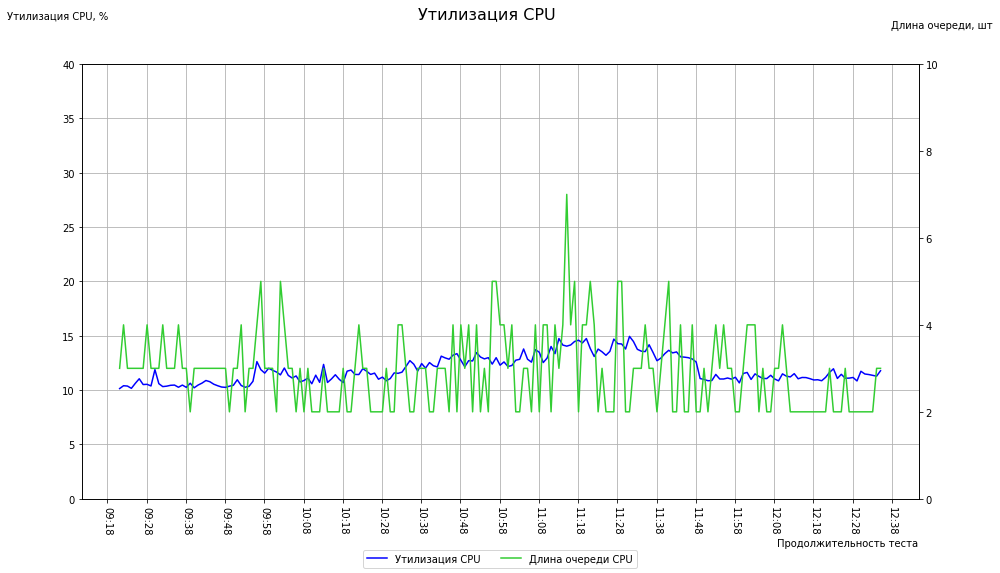

In [470]:
# Параметр, отвечающий за частоту значений по оси x
time_interval = 10

# Вывод данных для утилизации CPU
# Перевод времени в числовой формат, чтобы он определялся нормально в pyplot
df_CPU_Raw = pd.read_csv('sar_mpgu_izh.csv', header = 1, delim_whitespace = True, parse_dates=['09:20:06'], nrows = 4877)
df_CPU_Raw['09:20:06']=dates.date2num(df_CPU_Raw['09:20:06'])
df_CPU_Raw.rename(columns={'09:20:06':'Time'}, inplace=True)
df_CPU = df_CPU_Raw.loc[df_CPU_Raw['CPU'] == 'all', ['Time', '%idle']]
df_CPU['%idle'] = pd.to_numeric(df_CPU['%idle'])
df_CPU['%idle'] = 100 - df_CPU['%idle']

# Вывод данных для длины очереди
# Перевод времени в числовой формат, чтобы он определялся нормально в pyplot
df_Queue = pd.read_csv('sar_mpgu_izh.csv', header=1, delim_whitespace = True, parse_dates=['09:20:06'], skiprows=56864, nrows=195)
df_Queue['09:20:06']=dates.date2num(df_Queue['09:20:06'])
df_Queue.rename(columns={'09:20:06':'Time'}, inplace=True)


# Построение графика
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Утилизация CPU", fontsize=16)

# Подграфик с утилизацией CPU.
ax1 = plt.subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
plt.grid(True)
ax1.set_ylim(0, 40)
ax1.plot(df_CPU['Time'], df_CPU['%idle'], color='blue', label='Утилизация CPU')
ax1.set_xlabel('Продолжительность теста', loc='right')
ax1.set_ylabel('Утилизация CPU, %', rotation=0, y=1.1)
ax1.tick_params(axis='x', labelrotation=270)

# Подграфик с длиной очереди.
ax2 = ax1.twinx()
ax2.set_ylim(0, 10)
ax2.plot(df_Queue['Time'],df_Queue['runq-sz'], color='limegreen', label='Длина очереди CPU')
ax2.xaxis.label.set_visible(False)
ax2.set_ylabel('Длина очереди, шт', rotation=0, y=1.1)


fig.legend(loc='lower center', ncol=2)
# Показ графика
plt.show()


## График "Утилизация памяти"

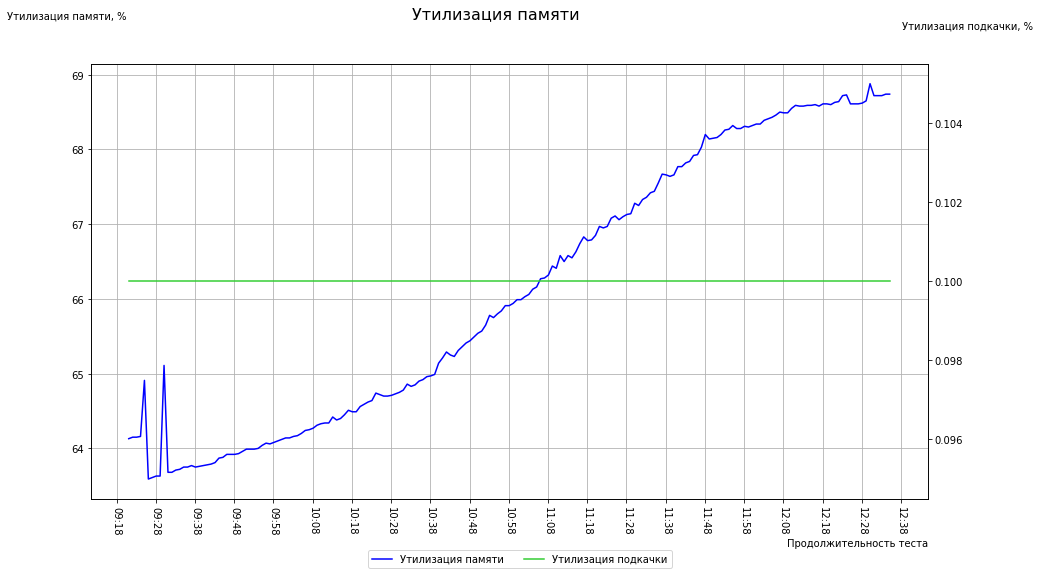

In [469]:
# Параметр, отвечающий за частоту значений по оси x
time_interval = 10

# Вывод данных для утилизации Памяти
df_Mem = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=56270,
                       nrows=195)
df_Mem['09:20:06']=dates.date2num(df_Mem['09:20:06'])
df_Mem.rename(columns={'09:20:06':'Time'}, inplace=True)


# Вывод данных для утилизации Подкачки
df_Swp = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=56468,
                       nrows=195)
df_Swp['09:20:06']=dates.date2num(df_Swp['09:20:06'])
df_Swp.rename(columns={'09:20:06':'Time'}, inplace=True)


# Построение графика
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Утилизация памяти", fontsize=16)

# Подграфик с утилизацией Памяти.
ax1 = plt.subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
plt.grid(True)
ax1.plot(df_Mem['Time'], df_Mem['%memused'], color='blue', label='Утилизация памяти')
ax1.set_xlabel('Продолжительность теста', loc='right')
ax1.set_ylabel('Утилизация памяти, %', rotation=0, y=1.1)
ax1.tick_params(axis='x', labelrotation=270)

# Подграфик с утилизацией Подкачки.
ax2 = ax1.twinx()
ax2.plot(df_Swp['Time'],df_Swp['%swpused'], color='limegreen', label='Утилизация подкачки')
ax2.xaxis.label.set_visible(False)
ax2.set_ylabel('Утилизация подкачки, %', rotation=0, y=1.1)


fig.legend(loc='lower center', ncol=2)
# Показ графика
plt.show()


## График "Среднее время чтения/записи (устройство)"

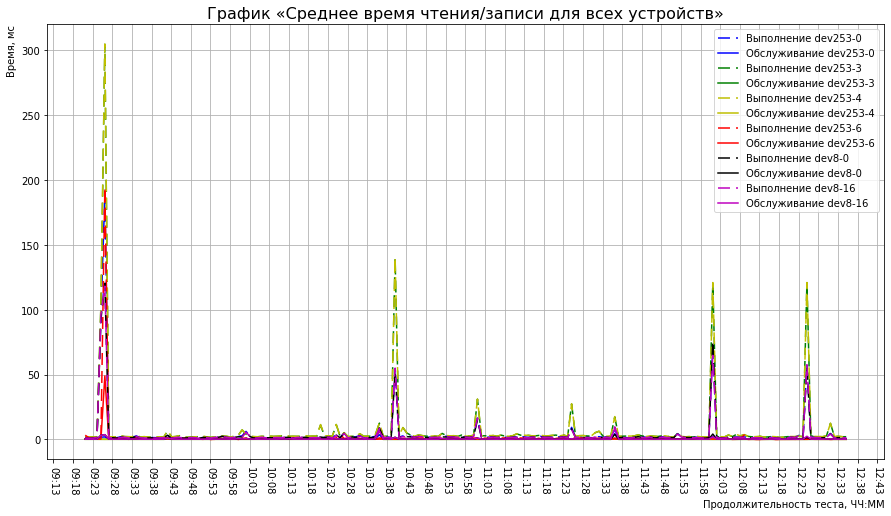

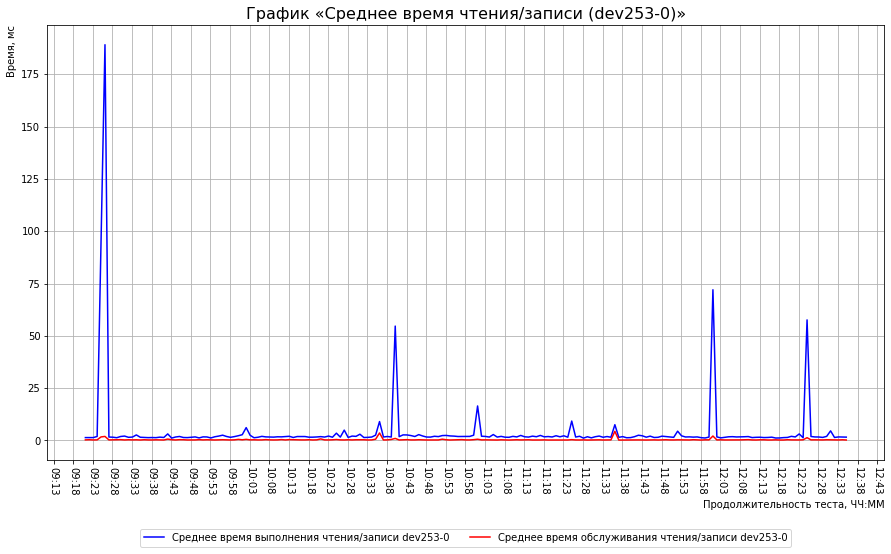

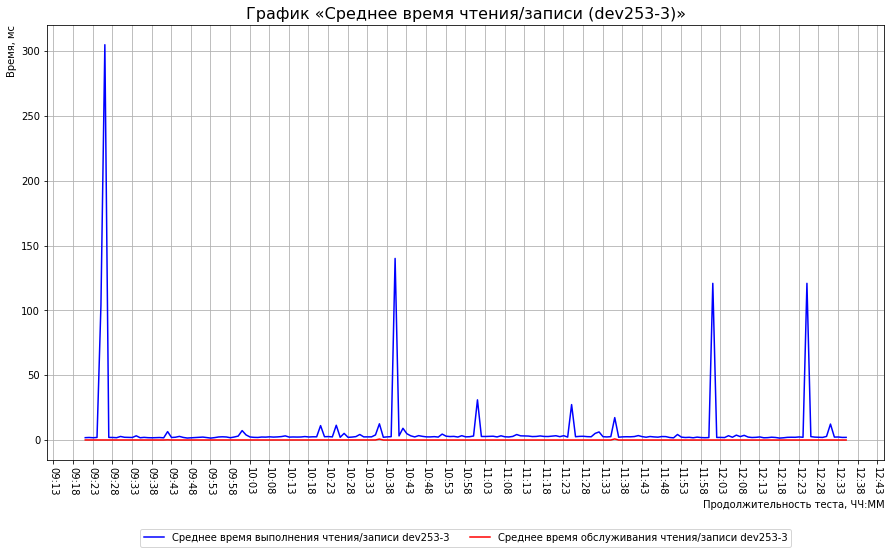

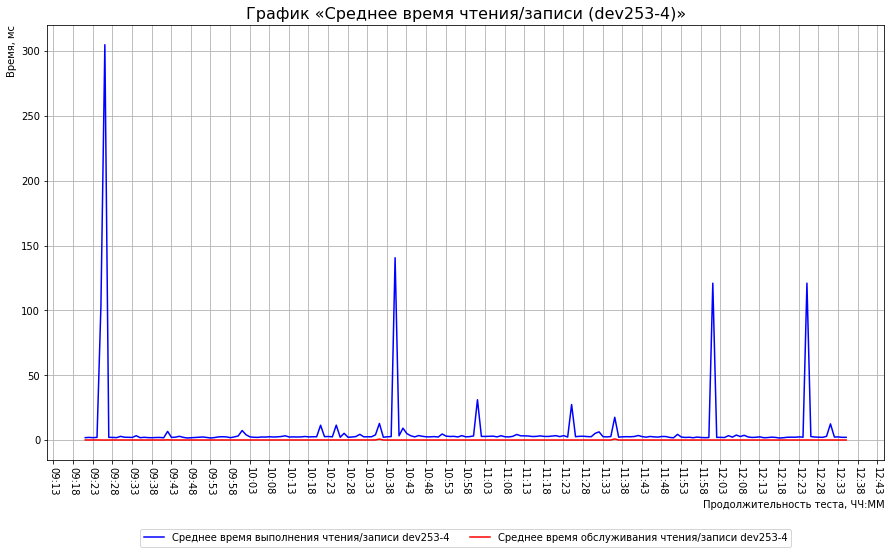

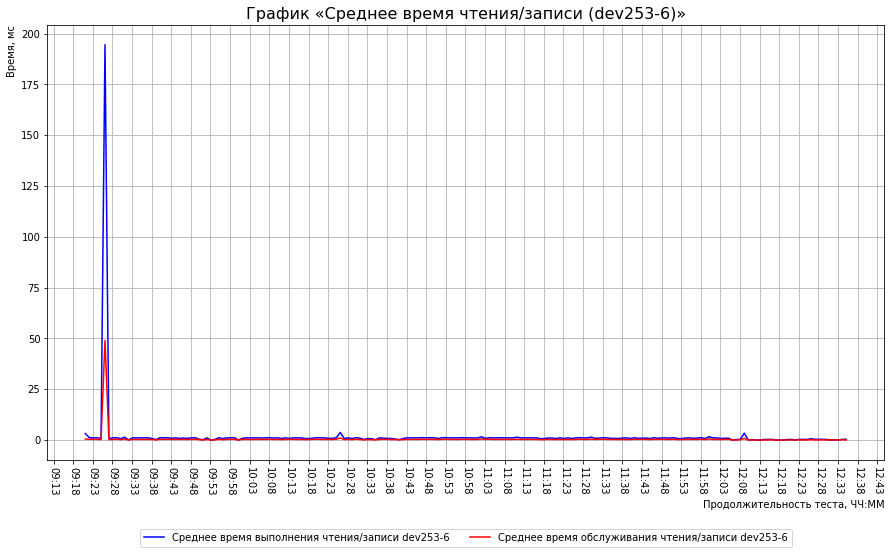

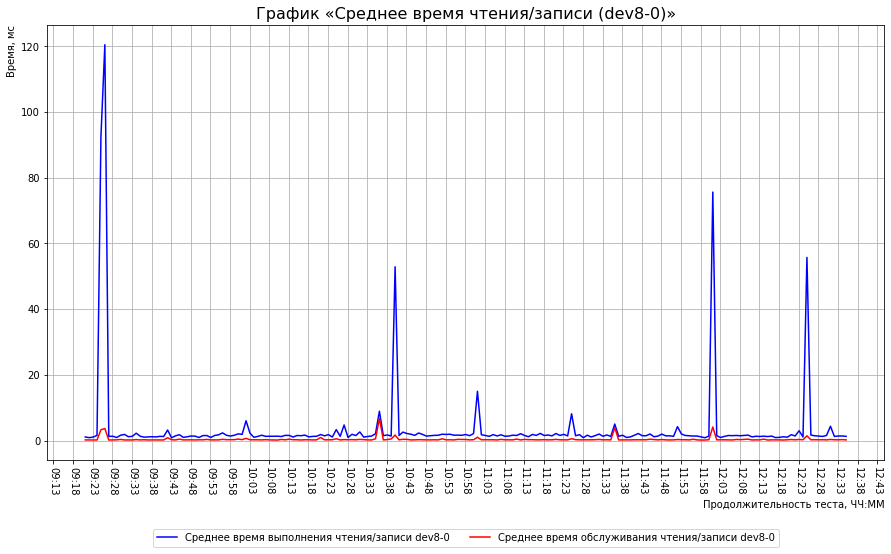

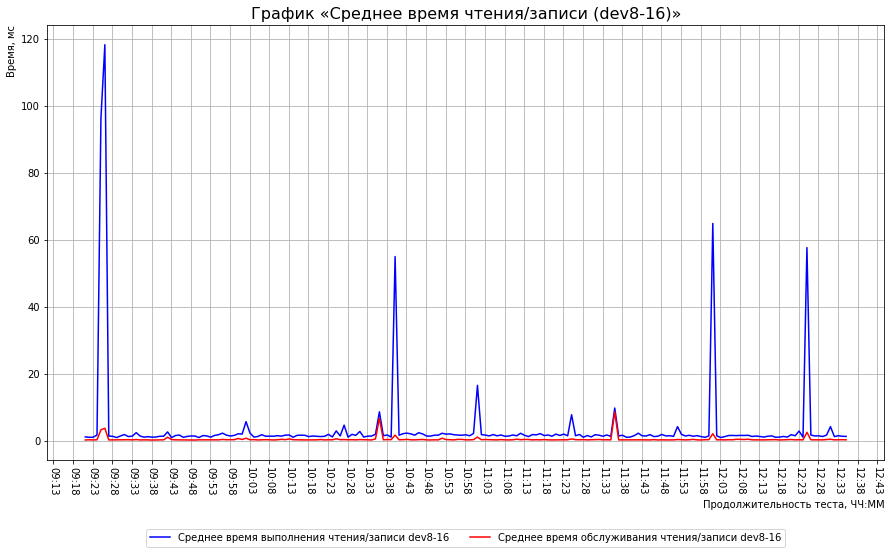

In [468]:
# Параметры
time_interval = 5


# Вывод данных
df_IO_dev_raw = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=57062,
                       nrows=4290)
df_IO_dev_raw['09:20:06']=dates.date2num(df_IO_dev_raw['09:20:06'])
df_IO_dev_raw.rename(columns={'09:20:06':'Time'}, inplace=True)

# Уникальные названия устройств, чтобы по ним проходиться
dev_name_list = df_IO_dev_raw['DEV'].unique()
dev_color_list = ['b','g','y','r','k','m']
color_cnt = 0

# График по всем устройствам
x = df_IO_dev['Time']
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.grid(True)
ax.set_title(f"График «Среднее время чтения/записи для всех устройств»", fontsize=16)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
ax.tick_params(axis='x', labelrotation=270)
ax.set_xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
ax.set_ylabel('Время, мс', loc='top')

# Цикл для вывода отдельных графиков по устройствам с ненулевыми значениями
for dev_name in dev_name_list:
    df_IO_dev = df_IO_dev_raw.loc[df_IO_dev_raw['DEV'] == dev_name, ['Time', 'await', 'svctm']]
    # Выцепляем лишь те устройства с ненулевыми значениями (если все значения 0 - False)
    # Записал через all() с приближением, что ненулевые значения во всех столбцах
    if all(df_IO_dev.any()):
        y1 = df_IO_dev['await']
        y2 = df_IO_dev['svctm']

        # Построение графика
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.title(f"График «Среднее время чтения/записи ({dev_name})»", fontsize=16)
        plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
        plt.xticks(rotation=270)
        plt.xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
        plt.ylabel('Время, мс', loc='top')
        plt.plot(x, y1, color='blue', label=f'Среднее время выполнения чтения/записи {dev_name}')
        plt.plot(x, y2, color='red', label=f'Среднее время обслуживания чтения/записи {dev_name}')
        plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.2), borderaxespad=0.)
        
        
        ax.plot(x, y1, label=f'Выполнение {dev_name}', dashes=[8, 4], color=dev_color_list[color_cnt])
        ax.plot(x, y2, label=f'Обслуживание {dev_name}',color=dev_color_list[color_cnt])
        color_cnt += 1
# Показ графика
ax.legend()
plt.show()



## График «Очередь дисковой подсистемы (устройство)»

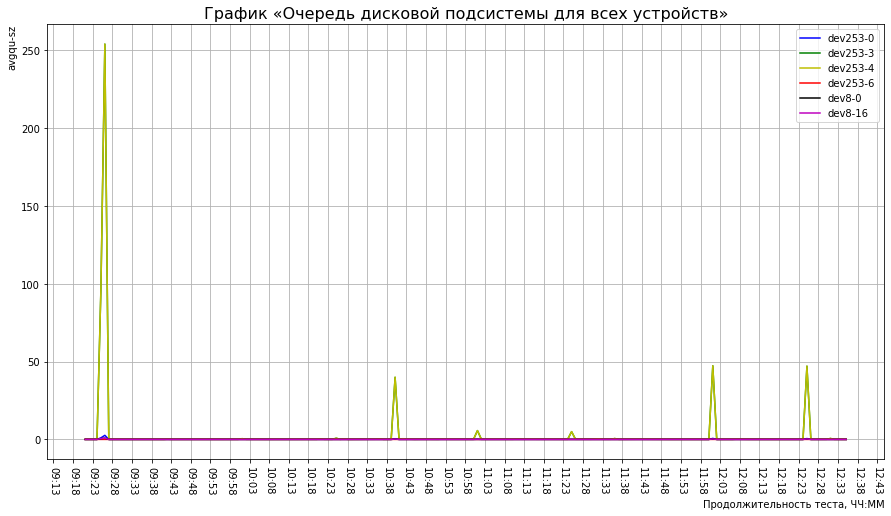

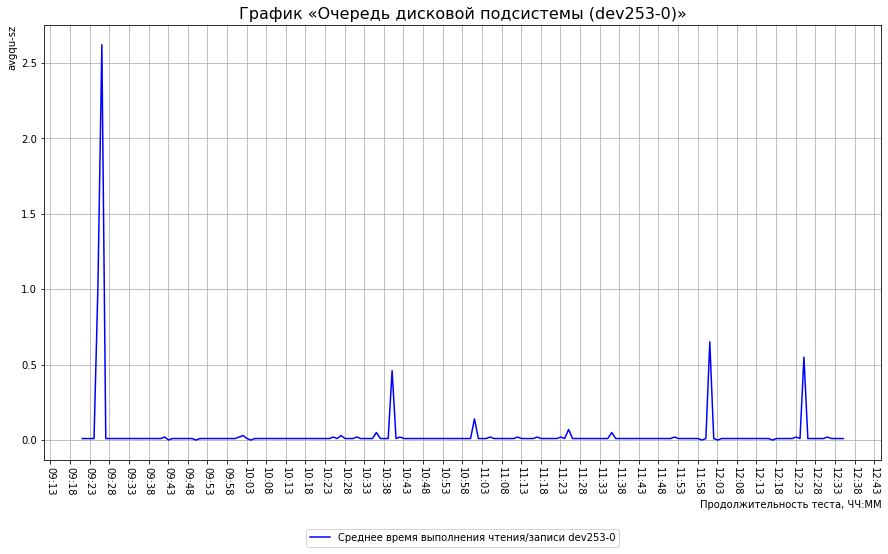

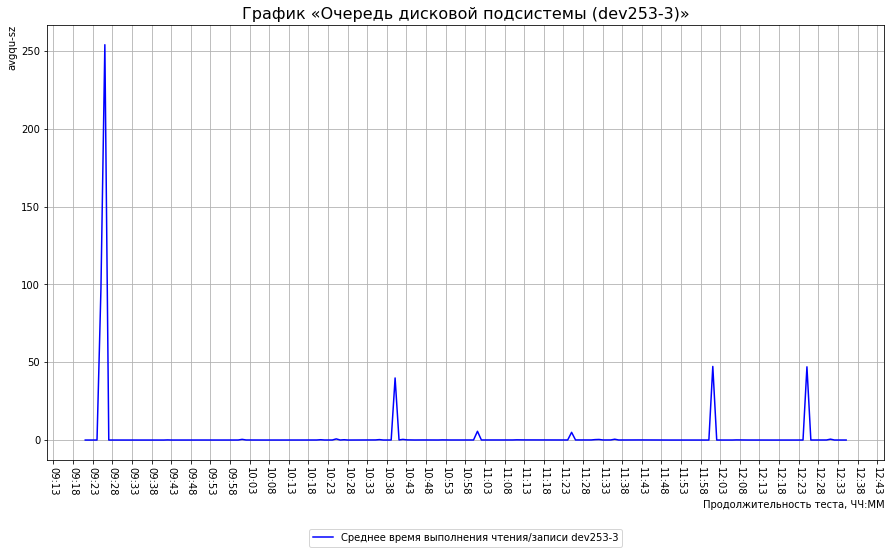

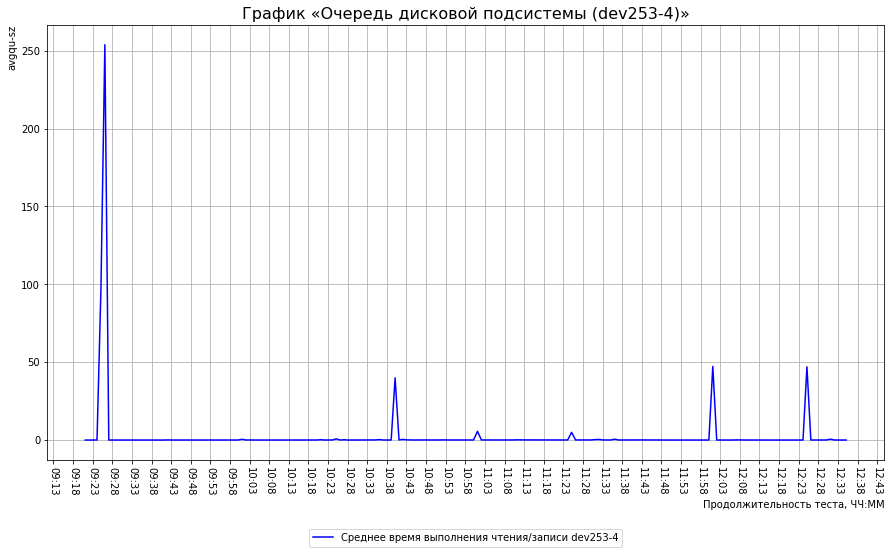

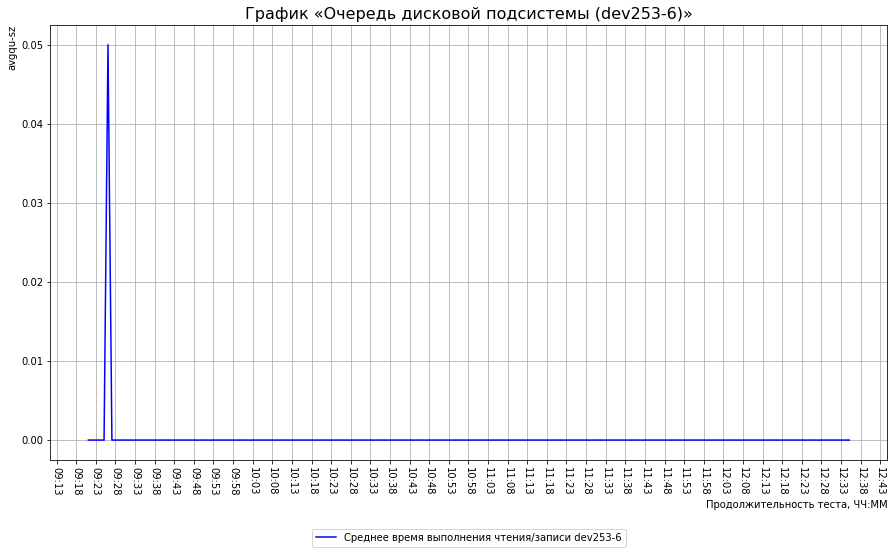

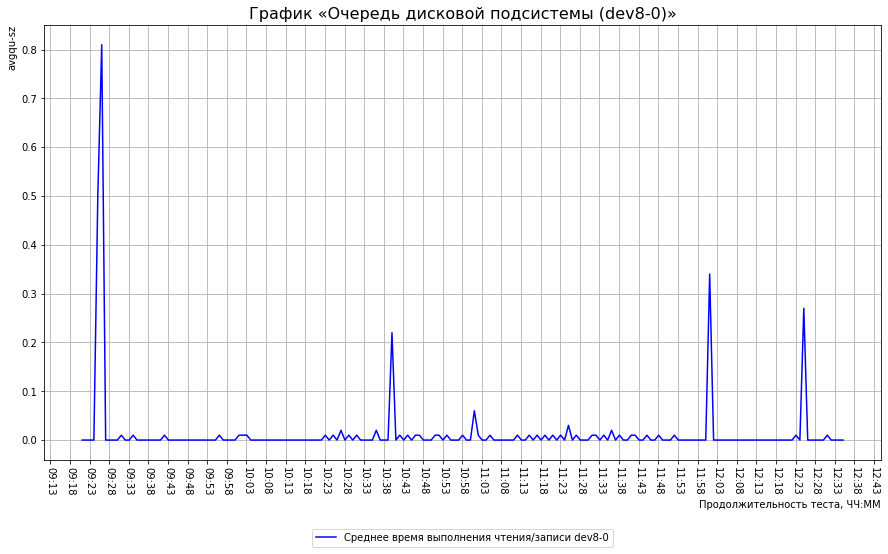

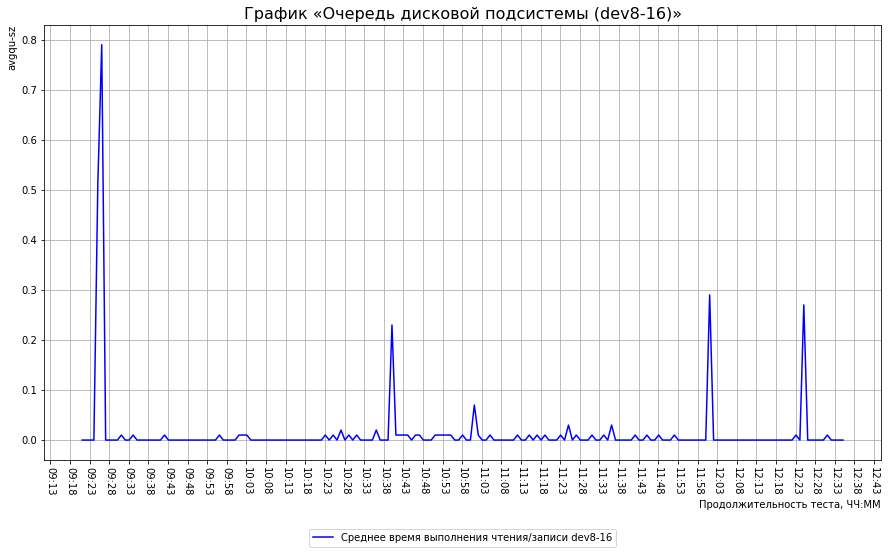

In [467]:
# Параметры
time_interval = 5


# Вывод данных
df_IO_dev_raw = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=57062,
                       nrows=4290)
df_IO_dev_raw['09:20:06']=dates.date2num(df_IO_dev_raw['09:20:06'])
df_IO_dev_raw.rename(columns={'09:20:06':'Time'}, inplace=True)

# Уникальные названия устройств, чтобы по ним проходиться
dev_name_list = df_IO_dev_raw['DEV'].unique()
dev_color_list = ['b','g','y','r','k','m']
color_cnt = 0

# График по всем устройствам
x = df_IO_dev['Time']
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.grid(True)
ax.set_title("График «Очередь дисковой подсистемы для всех устройств»", fontsize=16)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
ax.tick_params(axis='x', labelrotation=270)
ax.set_xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
ax.set_ylabel('avgqu-sz', loc='top')


# Цикл для вывода отдельных графиков по устройствам с ненулевыми значениями
for dev_name in dev_name_list:
    df_IO_dev = df_IO_dev_raw.loc[df_IO_dev_raw['DEV'] == dev_name, ['Time', 'avgqu-sz']]
    # Выцепляем лишь те устройства с ненулевыми значениями (если все значения 0 - False)
    # Записал через all() с приближением, что ненулевые значения во всех столбцах
    if all(df_IO_dev.any()):
        y = df_IO_dev['avgqu-sz']

        # Построение графика
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.title(f"График «Очередь дисковой подсистемы ({dev_name})»", fontsize=16)
        plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
        plt.xticks(rotation=270)
        plt.xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
        plt.ylabel('avgqu-sz', loc='top')
        plt.plot(x, y, color='blue', label=f'Среднее время выполнения чтения/записи {dev_name}')
        plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.2), borderaxespad=0.)
        
        
        ax.plot(x, y, label=f'{dev_name}', color=dev_color_list[color_cnt])
        color_cnt += 1
# Показ графика
ax.legend()
plt.show()



## График «Утилизация CPU дисковой подсистемой (устройство)»

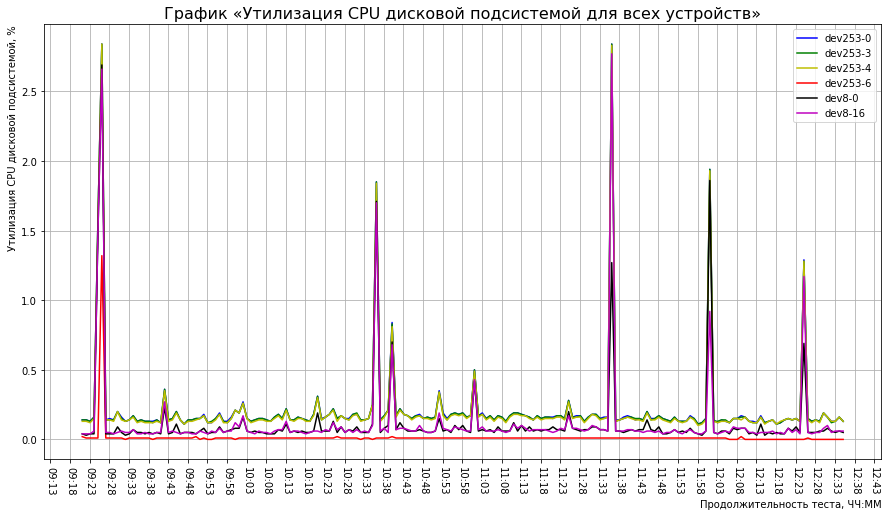

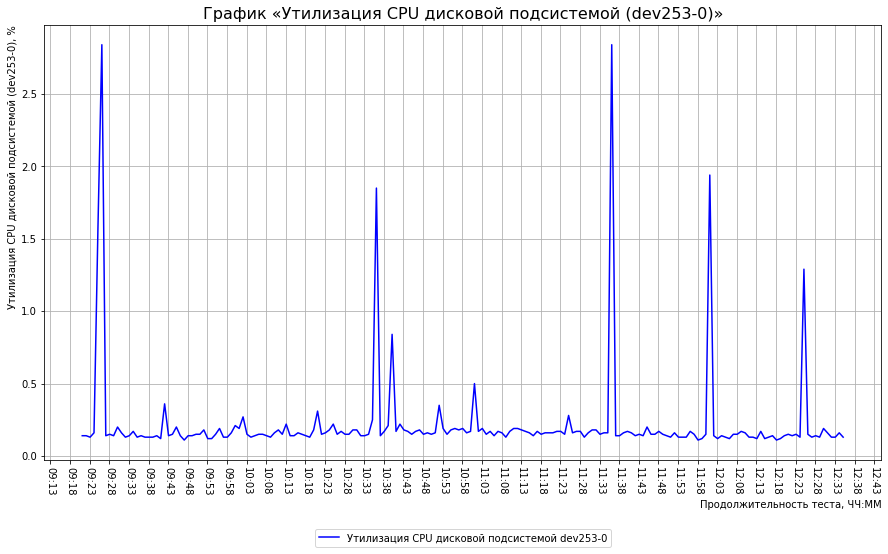

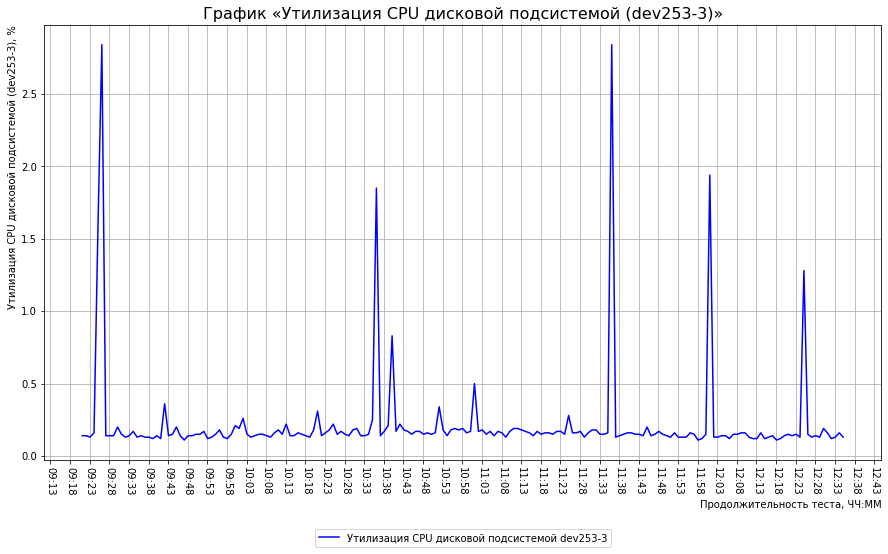

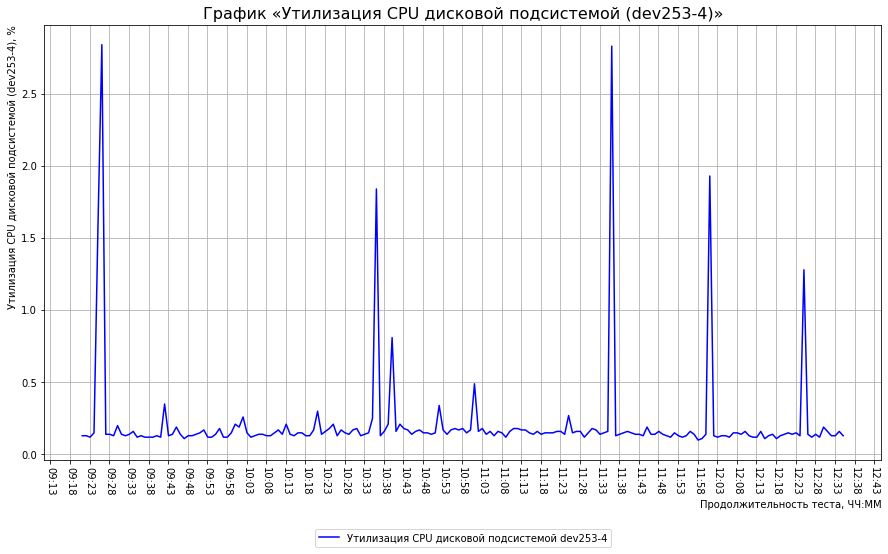

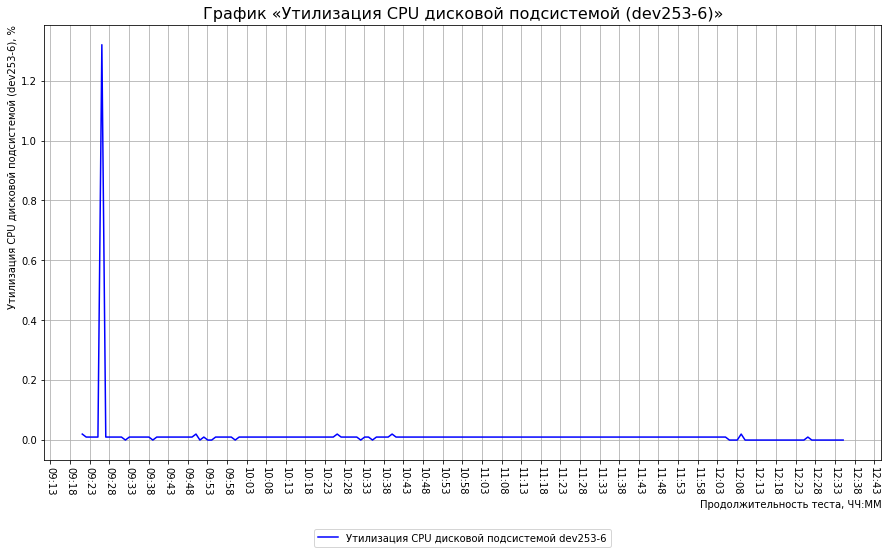

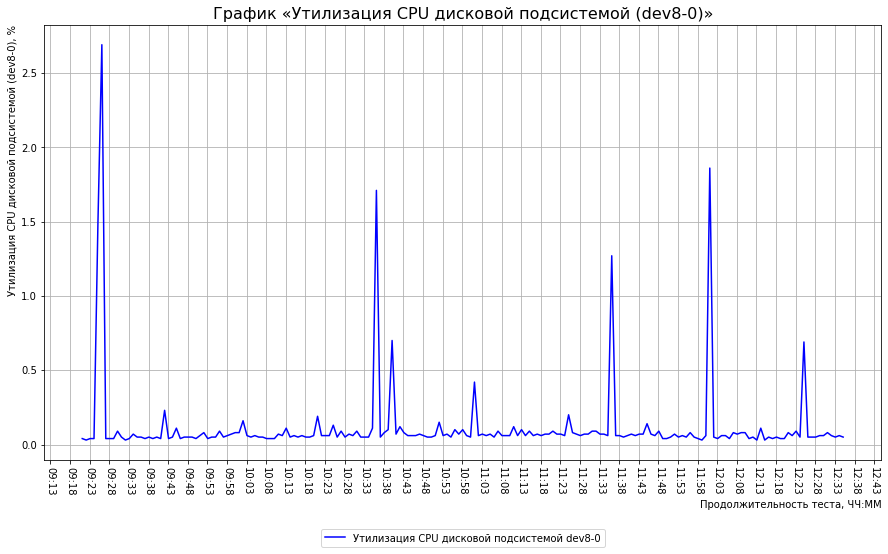

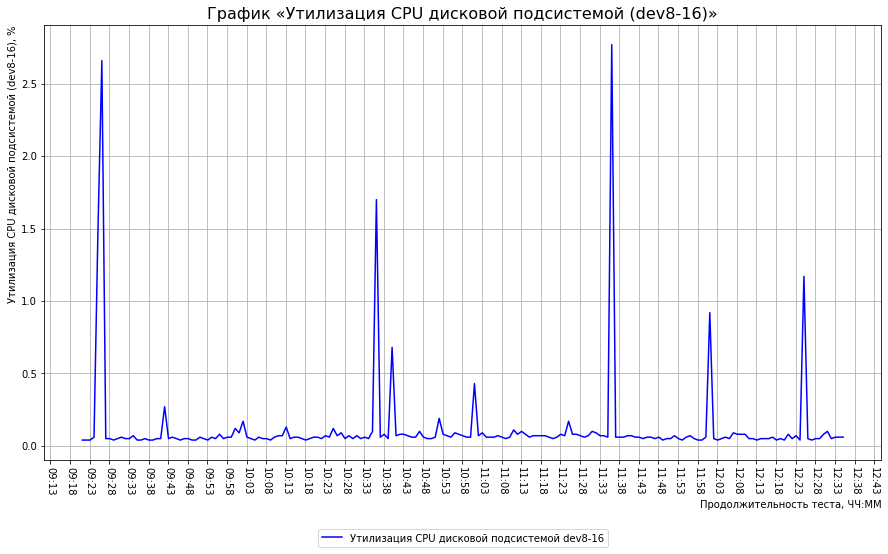

In [466]:
# Параметры
time_interval = 5


# Вывод данных
df_IO_dev_raw = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=57062,
                       nrows=4290)
df_IO_dev_raw['09:20:06']=dates.date2num(df_IO_dev_raw['09:20:06'])
df_IO_dev_raw.rename(columns={'09:20:06':'Time'}, inplace=True)

# Уникальные названия устройств, чтобы по ним проходиться
dev_name_list = df_IO_dev_raw['DEV'].unique()
dev_color_list = ['b','g','y','r','k','m']
color_cnt = 0

# График по всем устройствам
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.grid(True)
ax.set_title("График «Утилизация CPU дисковой подсистемой для всех устройств»", fontsize=16)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
ax.tick_params(axis='x', labelrotation=270)
ax.set_xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
ax.set_ylabel('Утилизация CPU дисковой подсистемой, %', loc='top')


# Цикл для вывода отдельных графиков по устройствам с ненулевыми значениями
for dev_name in dev_name_list:
    df_IO_dev = df_IO_dev_raw.loc[df_IO_dev_raw['DEV'] == dev_name, ['Time', '%util']]
    # Выцепляем лишь те устройства с ненулевыми значениями (если все значения 0 - False)
    # Записал через all() с приближением, что ненулевые значения во всех столбцах
    if all(df_IO_dev.any()):
        x = df_IO_dev['Time']
        y = df_IO_dev['%util']

        # Построение графика
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.title(f"График «Утилизация CPU дисковой подсистемой ({dev_name})»", fontsize=16)
        plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
        plt.xticks(rotation=270)
        plt.xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
        plt.ylabel(f'Утилизация CPU дисковой подсистемой ({dev_name}), %', loc='top')
        plt.plot(x, y, color='blue', label=f'Утилизация CPU дисковой подсистемой {dev_name}')
        plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.2), borderaxespad=0.)
        
        
        ax.plot(x, y, label=f'{dev_name}', color=dev_color_list[color_cnt])
        color_cnt += 1
# Показ графика
ax.legend()
plt.show()



## График «Утилизация сетевого интерфейса (интерфейс)»

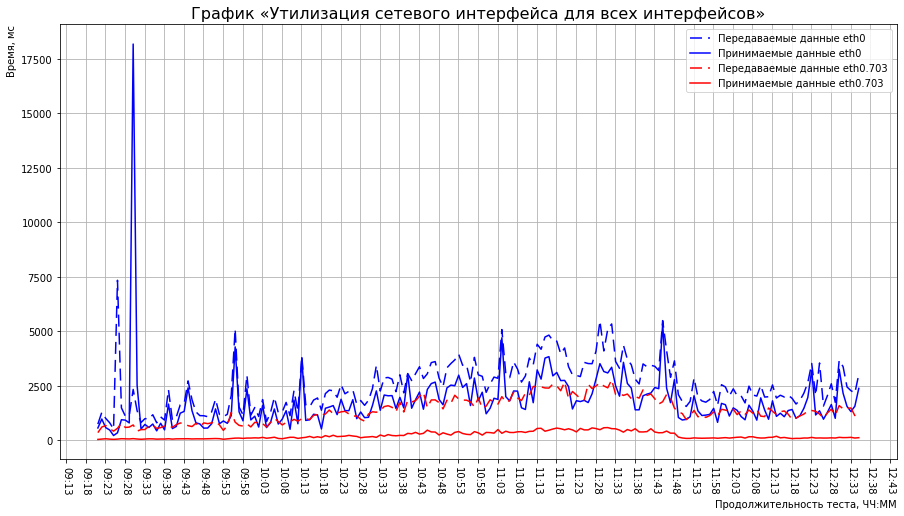

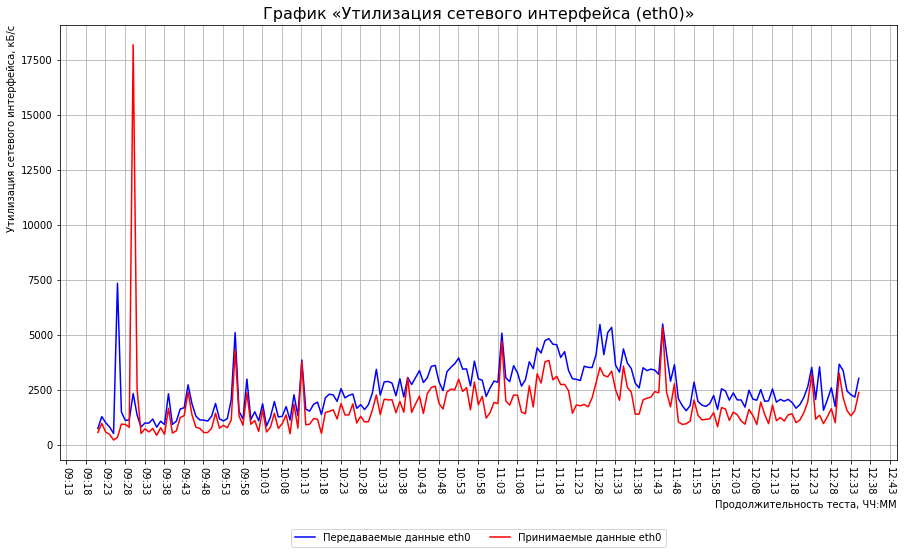

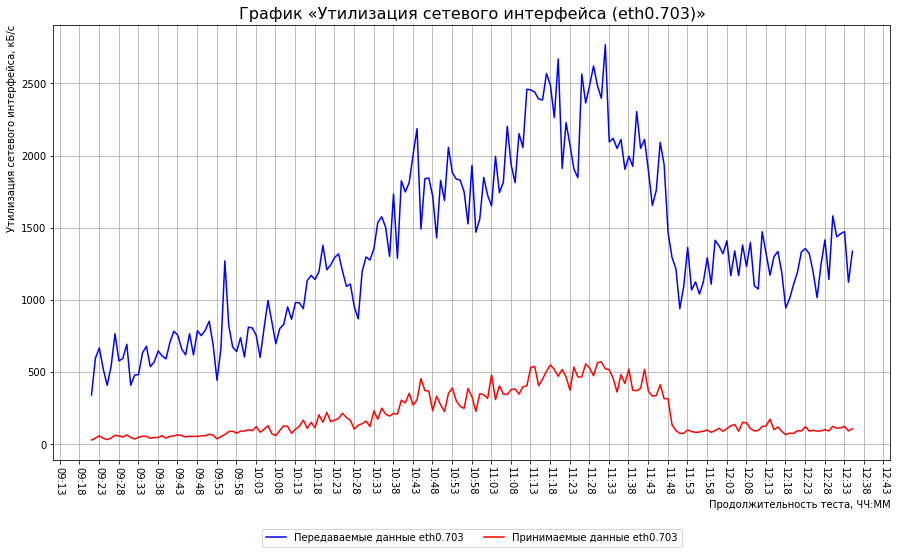

In [465]:
# Параметры
time_interval = 5


# Вывод данных
df_raw = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=61376,
                       nrows=1365)
df_raw['09:20:06']=dates.date2num(df_raw['09:20:06'])
df_raw.rename(columns={'09:20:06':'Time'}, inplace=True)

# Уникальные названия устройств, чтобы по ним проходиться
int_name_list = df_raw['IFACE'].unique()
int_color_list = ['b','r','y','g','k','m']
color_cnt = 0

# График по всем устройствам

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.grid(True)
ax.set_title("График «Утилизация сетевого интерфейса для всех интерфейсов»", fontsize=16)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
ax.tick_params(axis='x', labelrotation=270)
ax.set_xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
ax.set_ylabel('Время, мс', loc='top')

# Цикл для вывода отдельных графиков по устройствам с ненулевыми значениями
for int_name in int_name_list:
    df_interface = df_raw.loc[df_raw['IFACE'] == int_name, ['Time', 'txkB/s', 'rxkB/s']]
    # Выцепляем лишь те устройства с ненулевыми значениями (если все значения 0 - False)
    # Записал через all() с приближением, что ненулевые значения во всех столбцах
    if all(df_interface.any()):
        x = df_interface['Time']
        y1 = df_interface['txkB/s']
        y2 = df_interface['rxkB/s']

        # Построение графика
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.title(f"График «Утилизация сетевого интерфейса ({int_name})»", fontsize=16)
        plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
        plt.xticks(rotation=270)
        plt.xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
        plt.ylabel('Утилизация сетевого интерфейса, кБ/с', loc='top')
        plt.plot(x, y1, color='blue', label=f'Передаваемые данные {int_name}')
        plt.plot(x, y2, color='red', label=f'Принимаемые данные {int_name}')
        plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.2), borderaxespad=0.)
        
        
        ax.plot(x, y1, label=f'Передаваемые данные {int_name}', dashes=[8, 4], color=int_color_list[color_cnt])
        ax.plot(x, y2, label=f'Принимаемые данные {int_name}',color=int_color_list[color_cnt])
        color_cnt += 1
# Показ графика
ax.legend()
plt.show()



## График «Динамика Load Average»

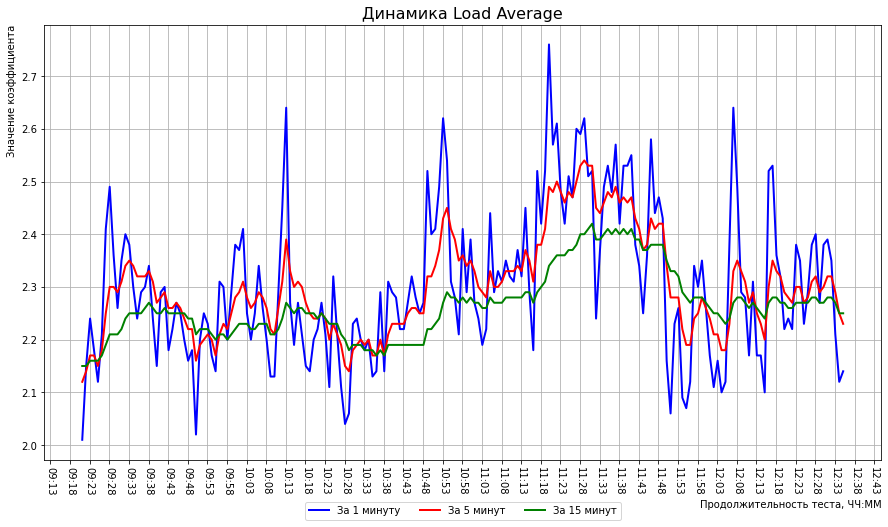

In [487]:
# Параметры
time_interval = 5


# Вывод данных
df_load_avg = pd.read_csv('sar_mpgu_izh.csv', 
                       header=1, 
                       delim_whitespace = True, 
                       parse_dates=['09:20:06'], 
                       skiprows=56864,
                       nrows=195)
df_load_avg['09:20:06']=dates.date2num(df_load_avg['09:20:06'])
df_load_avg.rename(columns={'09:20:06':'Time'}, inplace=True)

x = df_load_avg['Time']
y1 = df_load_avg['ldavg-1']
y2 = df_load_avg['ldavg-5']
y3 = df_load_avg['ldavg-15']

# Построение графика
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.title("Динамика Load Average", fontsize=16)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=time_interval))
plt.xticks(rotation=270)
plt.xlabel('Продолжительность теста, ЧЧ:ММ', loc='right')
plt.ylabel('Значение коэффициента', loc='top')
plt.plot(x, y1, linewidth=2.0, color='blue', label='За 1 минуту')
plt.plot(x, y2, linewidth=2.0, color='red', label='За 5 минут')
plt.plot(x, y3, linewidth=2.0, color='green', label='За 15 минут')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15))

# Показ графика
plt.show()

